In [1]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [52]:
school_2015_data = "chi_school_2015_2016.csv"
school_2015_df = pd.read_csv(school_2015_data)
school_2015_df = school_2015_df[school_2015_df['Primary_Category'] == 'HS']
school_2015_df = school_2015_df[['Zip','Student_Attendance_Year_2_Pct','College_Enrollment_School_Pct_Year_2']]
school_2015_df = school_2015_df.dropna()
#school_2015_df
school_2015_group2_df = school_2015_df.groupby('Zip').mean()
school_2015_group2_df.reset_index(inplace=True)
school_2015_group2_df

,Zip,Student_Attendance_Year_2_Pct,College_Enrollment_School_Pct_Year_2
0,60602,84.250000,59.250000
1,60605,93.800000,87.600000
2,60607,94.200000,72.950000
3,60608,83.490000,44.950000
4,60609,87.016667,36.516667
5,60610,92.900000,83.700000
6,60612,77.616667,38.533333
7,60613,89.700000,68.400000
8,60614,90.100000,78.100000
9,60615,89.900000,73.500000


In [5]:
# File to Load (Remember to Change These)
school_data = "cleaned_school_data.csv"
school_data_df = pd.read_csv(school_data)
school_data_df


,Unnamed: 0,School ID,Year_x,"Elementary, Middle, or High School",ZIP Code,Average Student Attendance,College Enrollment Rate %,Population
0,2,609680,2011,HS,60610,93.4,82.4,70268.0
1,5,609722,2011,HS,60612,66.8,51.9,35013.0
2,8,609749,2011,HS,60625,95.7,90.7,53233.0
3,11,610244,2011,HS,60644,79.1,60.4,28235.0
4,14,610394,2011,HS,60640,88.7,65.0,44964.0
...,...,...,...,...,...,...,...,...
451,1353,609698,2021,HS,60652,85.9,53.5,61179.0
452,1356,609748,2021,HS,60608,73.7,4.0,36940.0
453,1359,400126,2021,HS,60651,59.7,21.1,32326.0
454,1362,400119,2021,HS,60624,85.5,48.9,21538.0


In [37]:
yeah_school_df = school_data_df.groupby(['Year_x'])
#yeah_school_df = yeah_school_df["Average Student Attendance","College Enrollment Rate %"]

In [38]:
attendance = yeah_school_df["Average Student Attendance"].mean()
college_rate = yeah_school_df["College Enrollment Rate %"].mean()

In [32]:
rate_df = pd.DataFrame({
    "attendance": attendance,
    "college rate": college_rate
})

rate_df

,attendance,college rate
Year,,
2011,83.563441,57.092473
2015,88.771170,52.447872
2021,84.563486,57.145714


In [39]:
attend = school_data_df["Average Student Attendance"]
c_rate = school_data_df["College Enrollment Rate %"]

Text(0, 0.5, 'rate')

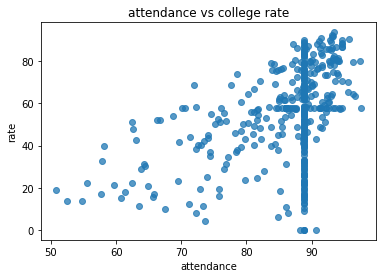

In [40]:
plt.scatter(attend,c_rate,marker='o',alpha=0.75)
plt.title("attendance vs college rate")
plt.xlabel('attendance')
plt.ylabel('rate')

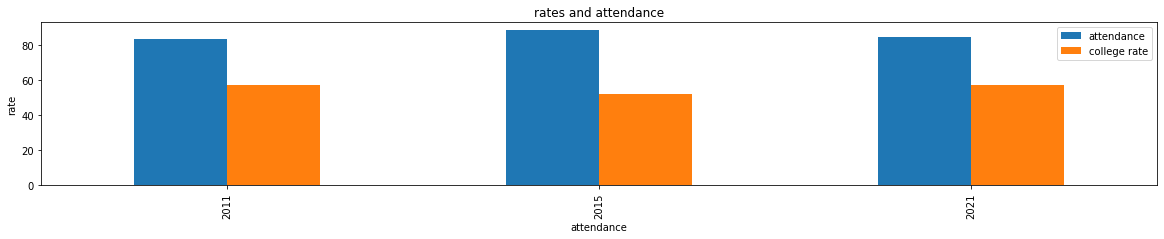

<Figure size 432x288 with 0 Axes>

In [47]:
rate_df.plot(kind="bar",figsize=(20,3),)
y = rate_df["college rate"]
plt.title("rates and attendance")
plt.ylabel("rate")
plt.xlabel("attendance")
plt.show()
plt.tight_layout()

In [6]:
school_2011_df = school_data_df[school_data_df['Year_x'] == 2011]
school_2015_df = school_data_df[school_data_df['Year_x'] == 2015]
school_2021_df = school_data_df[school_data_df['Year_x'] == 2021]

In [7]:
grouped_zips_2011_df = school_2011_df.groupby('ZIP Code').mean()
grouped_zips_2011_df.reset_index(inplace=True)
grouped_zips_2011_df = grouped_zips_2011_df[['ZIP Code', 'Year_x',
       'Average Student Attendance', 'College Enrollment Rate %',
       'Population']]
grouped_zips_2011_df.head()

,ZIP Code,Year_x,Average Student Attendance,College Enrollment Rate %,Population
0,60605,2011.0,93.800000,86.9,75030.0
1,60607,2011.0,94.600000,88.3,79242.0
2,60608,2011.0,83.700000,48.8,35477.0
3,60609,2011.0,87.433333,45.9,34725.0
4,60610,2011.0,93.400000,82.4,70268.0


In [30]:
grouped_zips_2015_df = school_2015_df.groupby('ZIP Code').mean()
grouped_zips_2015_df.reset_index(inplace=True)
grouped_zips_2015_df = grouped_zips_2015_df[['ZIP Code', 'Year_x',
       'Average Student Attendance', 'College Enrollment Rate %',
       'Population']]
grouped_zips_2015_df

,ZIP Code,Year_x,Average Student Attendance,College Enrollment Rate %,Population
0,60602,2015.0,88.800000,59.550000,57368.0
1,60605,2015.0,88.800000,88.500000,87668.0
2,60607,2015.0,88.800000,79.300000,85917.0
3,60608,2015.0,88.800000,44.272727,36216.0
4,60609,2015.0,88.800000,40.628571,32284.0
5,60610,2015.0,88.800000,66.100000,75892.0
6,60612,2015.0,88.800000,49.633333,35888.0
7,60613,2015.0,88.800000,67.600000,72126.0
8,60614,2015.0,88.800000,78.600000,92714.0
9,60615,2015.0,88.122500,68.175000,41108.0


In [25]:
grouped_zips_2021_df = school_2021_df.groupby('ZIP Code').mean()
grouped_zips_2021_df.reset_index(inplace=True)
grouped_zips_2021_df = grouped_zips_2021_df[['ZIP Code', 'Year_x',
       'Average Student Attendance', 'College Enrollment Rate %',
       'Population']]
grouped_zips_2021_df.head()

,ZIP Code,Year_x,Average Student Attendance,College Enrollment Rate %,Population
0,60602,2021.0,72.7000,54.3500,33273.0
1,60605,2021.0,91.3000,86.4000,102572.0
2,60607,2021.0,90.3950,73.0000,92790.0
3,60608,2021.0,77.4625,43.9875,36940.0
4,60609,2021.0,85.8400,51.8800,30024.0


Pull In Crime Data

In [2]:
crime_data_2011 = "crimes_rate_2011.csv"
crime_rate_2011_df = pd.read_csv(crime_data_2011)
crime_data_2015 = "crimes_rate_2015.csv"
crime_rate_2015_df = pd.read_csv(crime_data_2015)
crime_data_2021 = "crimes_rate_2021.csv"
crime_rate_2021_df = pd.read_csv(crime_data_2021)

In [28]:
crime_rate_2015_df.head()

,Unnamed: 0,Zip Code,Count of Crimes,2015,Crime Rate Per 100 People
0,0,60602,5148,57368.0,8.973644
1,1,60605,2341,87668.0,2.670302
2,2,60607,3016,85917.0,3.510365
3,3,60608,3247,36216.0,8.965651
4,4,60609,3666,32284.0,11.355470


In [77]:
crime_school_2011_df = crime_rate_2011_df.merge(grouped_zips_2011_df, left_on="Zip Code", right_on="ZIP Code")
crime_school_2015_df = crime_rate_2015_df.merge(school_2015_group2_df, left_on="Zip Code", right_on="Zip")
crime_school_2021_df = crime_rate_2021_df.merge(grouped_zips_2021_df, left_on="Zip Code", right_on="ZIP Code")
crime_school_2021_df.head()

,Unnamed: 0,Zip Code,Count of Crimes,2021,Crime Rate Per 100 People,ZIP Code,Year_x,Average Student Attendance,College Enrollment Rate %,Population
0,0,60602,5322,33273.0,15.994951,60602,2021.0,72.7000,54.3500,33273.0
1,1,60605,2394,102572.0,2.333970,60605,2021.0,91.3000,86.4000,102572.0
2,2,60607,3946,92790.0,4.252613,60607,2021.0,90.3950,73.0000,92790.0
3,3,60608,4324,36940.0,11.705468,60608,2021.0,77.4625,43.9875,36940.0
4,4,60609,4936,30024.0,16.440181,60609,2021.0,85.8400,51.8800,30024.0


Run regression analysis for 2011

In [19]:
from scipy.stats import linregress
import scipy.stats as sem

In [20]:
# def regresion_chart(x,y):
# x_values = crime_school_2011_df["Average Student Attendance"]
# y_values = crime_school_2011_df["Crime Rate Per 100 People"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(80,50),fontsize=15,color="red")
# plt.title("crime rate vs attendance")
# plt.xlabel('attendance')
# plt.ylabel('crime rate')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

The r-squared is: 0.25505603413025274


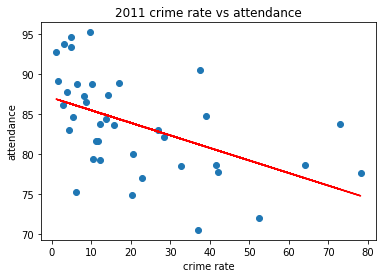

In [80]:
x_values = crime_school_2011_df["Crime Rate Per 100 People"]
y_values = crime_school_2011_df["Average Student Attendance"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,50),fontsize=15,color="red")
plt.title("2011 crime rate vs attendance")
plt.xlabel('crime rate')
plt.ylabel('attendance')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [22]:
x_values = crime_school_2011_df["Crime Rate Per 100 People"]
y_values = crime_school_2011_df["Average Student Attendance"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")


The Pearson Correlation Coefficient is -0.51



The r-squared is: 0.05349069100061563


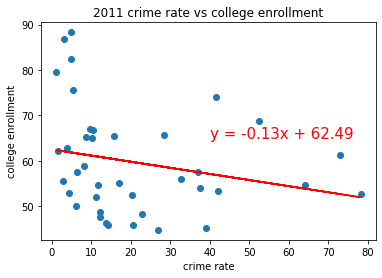

In [81]:
x_values = crime_school_2011_df["Crime Rate Per 100 People"]
y_values = crime_school_2011_df["College Enrollment Rate %"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,65),fontsize=15,color="red")
plt.title("2011 crime rate vs college enrollment")
plt.xlabel('crime rate')
plt.ylabel('college enrollment')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [64]:
x_values = crime_school_2011_df["Crime Rate Per 100 People"]
y_values = crime_school_2011_df["College Enrollment Rate %"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is -0.23



Run regression analysis for 2015

The r-squared is: 0.23120303401316145


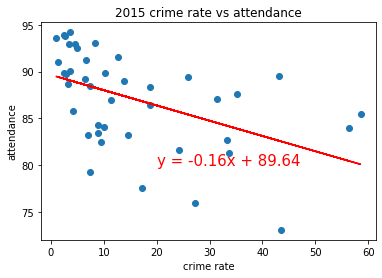

In [82]:
x_values = crime_school_2015_df["Crime Rate Per 100 People"]
y_values = crime_school_2015_df["Student_Attendance_Year_2_Pct"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,80),fontsize=15,color="red")
plt.title("2015 crime rate vs attendance")
plt.xlabel('crime rate')
plt.ylabel('attendance')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [74]:
x_values = crime_school_2015_df["Crime Rate Per 100 People"]
y_values = crime_school_2015_df["Student_Attendance_Year_2_Pct"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is -0.48



The r-squared is: 0.18773879893663692


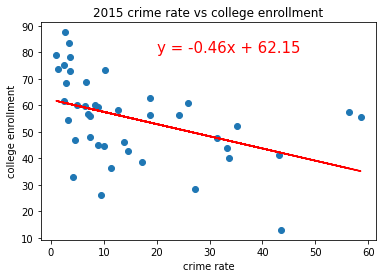

In [83]:
x_values = crime_school_2015_df["Crime Rate Per 100 People"]
y_values = crime_school_2015_df["College_Enrollment_School_Pct_Year_2"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,80),fontsize=15,color="red")
plt.title("2015 crime rate vs college enrollment")
plt.xlabel('crime rate')
plt.ylabel('college enrollment')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [76]:
x_values = crime_school_2015_df["Crime Rate Per 100 People"]
y_values = crime_school_2015_df["College_Enrollment_School_Pct_Year_2"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is -0.43



The r-squared is: 0.15467456042643632


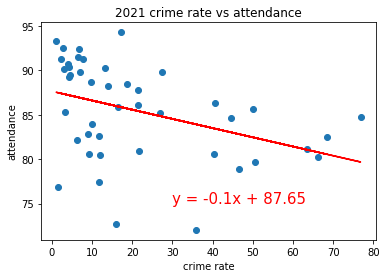

In [84]:
x_values = crime_school_2021_df["Crime Rate Per 100 People"]
y_values = crime_school_2021_df["Average Student Attendance"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,75),fontsize=15,color="red")
plt.title("2021 crime rate vs attendance")
plt.xlabel('crime rate')
plt.ylabel('attendance')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [65]:
x_values = crime_school_2021_df["Crime Rate Per 100 People"]
y_values = crime_school_2021_df["Average Student Attendance"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is -0.39



The r-squared is: 0.2438611043751028


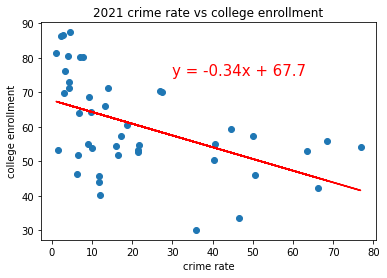

In [85]:
x_values = crime_school_2021_df["Crime Rate Per 100 People"]
y_values = crime_school_2021_df["College Enrollment Rate %"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,75),fontsize=15,color="red")
plt.title("2021 crime rate vs college enrollment")
plt.xlabel('crime rate')
plt.ylabel('college enrollment')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [79]:
x_values = crime_school_2021_df["Crime Rate Per 100 People"]
y_values = crime_school_2021_df["College Enrollment Rate %"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is -0.49

